POOVIKA M - 24BAD087
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
MSE: 200.95901199190564
RMSE: 14.176001269466141
R2 Score: 0.05002778385780371
study_hours : 0.2952716730279877
attendance : 0.36470265513

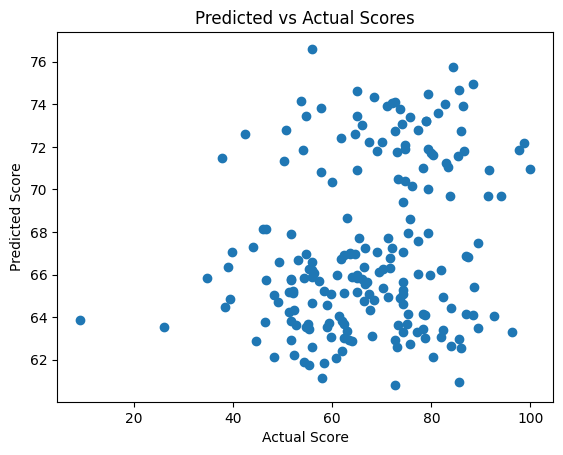

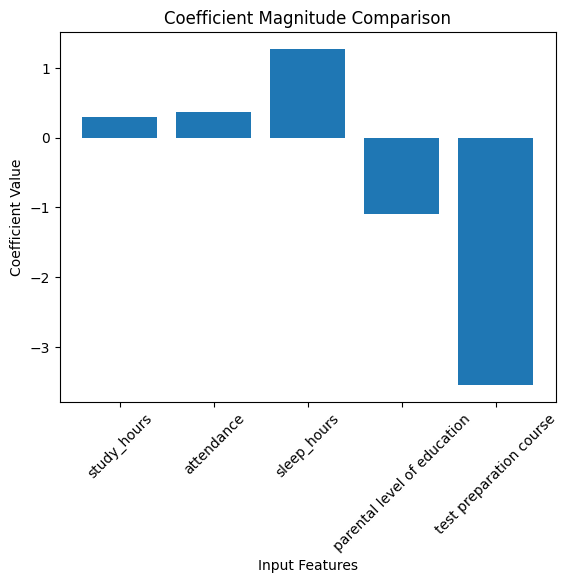

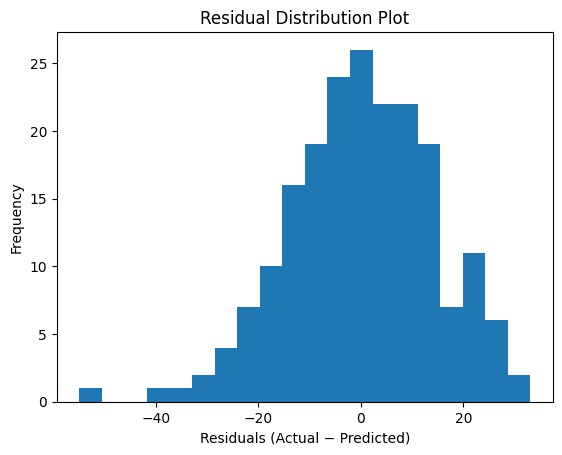

Ridge R2: 0.05005652706948205
Lasso R2: 0.05056142474377978


In [1]:
#POOVIKA M - 24BAD087
#SCENARIO 1 - MULTILINEAR REGRESSION

print("POOVIKA M - 24BAD087")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

path=r"/content/StudentsPerformance.csv"
data = pd.read_csv(path)
print(data.head())


le = LabelEncoder()

data['parental level of education'] = le.fit_transform(
    data['parental level of education']
)

data['test preparation course'] = le.fit_transform(
    data['test preparation course']
)


#Target variable
data['final_score'] = (
    data['math score'] +
    data['reading score'] +
    data['writing score']
) / 3

np.random.seed(1)

data['study_hours'] = np.random.randint(1, 6, len(data))
data['attendance'] = np.random.randint(60, 100, len(data))
data['sleep_hours'] = np.random.randint(5, 9, len(data))

#Input Features
X = data[['study_hours',
          'attendance',
          'sleep_hours',
          'parental level of education',
          'test preparation course']]

y = data['final_score']

#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

for name, coef in zip(X.columns, model.coef_):
    print(name, ":", coef)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Scores")
plt.show()

plt.figure()
plt.bar(X.columns, model.coef_)
plt.xlabel("Input Features")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Magnitude Comparison")
plt.xticks(rotation=45)
plt.show()

# Residual Distribution Plot

residuals = y_test - y_pred

plt.figure()
plt.hist(residuals, bins=20)
plt.xlabel("Residuals (Actual − Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution Plot")
plt.show()

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

print("Ridge R2:", ridge.score(X_test, y_test))
print("Lasso R2:", lasso.score(X_test, y_test))


POOVIKA M - 24BAD087
Polynomial Degree : 2
MSE : 13.760855128148345
RMSE : 3.709562659957147
R2 Score : 0.7440623896917427

Polynomial Degree : 3
MSE : 13.813374257350006
RMSE : 3.7166348027954004
R2 Score : 0.7430855884466042

Polynomial Degree : 4
MSE : 14.11802402282965
RMSE : 3.757395909779757
R2 Score : 0.7374194192854786



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


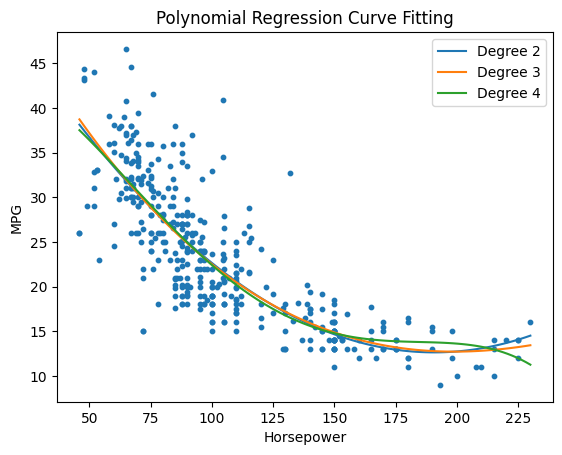

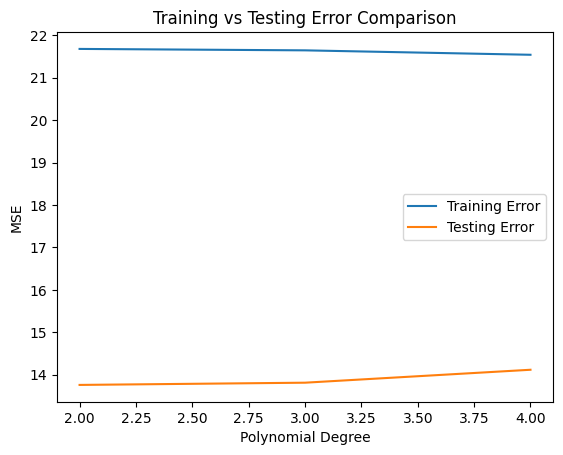

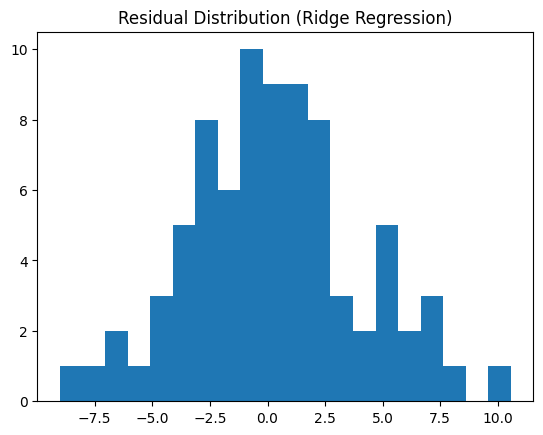

In [2]:
#POOVIKA M - 24BAD087
#SCENARIO 2 - POLYNOMIAL REGRESSION

print("POOVIKA M - 24BAD087")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load Auto MPG dataset
df = pd.read_csv("/content/auto-mpg.csv")

# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Convert horsepower to numeric
df["horsepower"] = pd.to_numeric(df["horsepower"])

# Drop car name column (non-numeric, not required)
df.drop("car name", axis=1, inplace=True)

# Handle missing values using mean (numeric columns only)
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

# Select independent and dependent variables
X = df[["horsepower"]]
y = df["mpg"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Polynomial degrees
degrees = [2, 3, 4]
results = {}

# Train Polynomial Regression models
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[d] = [mse, rmse, r2]

    print("Polynomial Degree :", d)
    print("MSE :", mse)
    print("RMSE :", rmse)
    print("R2 Score :", r2)
    print()

# Apply Ridge Regression to control overfitting (degree 4)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)

y_ridge_pred = ridge.predict(X_test_poly)

# Visualization: Polynomial curve fitting
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)

plt.figure()
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly_range = poly.fit_transform(X_range_scaled)
    model = LinearRegression()
    model.fit(poly.fit_transform(X_train), y_train)
    plt.plot(X_range, model.predict(X_poly_range), label=f"Degree {d}")

plt.scatter(X, y, s=10)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Curve Fitting")
plt.legend()
plt.show()

# Visualization: Training vs Testing Error
train_errors = []
test_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_errors.append(
        mean_squared_error(y_train, model.predict(X_train_poly))
    )
    test_errors.append(
        mean_squared_error(y_test, model.predict(X_test_poly))
    )

plt.figure()
plt.plot(degrees, train_errors, label="Training Error")
plt.plot(degrees, test_errors, label="Testing Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Training vs Testing Error Comparison")
plt.legend()
plt.show()

# Visualization: Residual distribution (Ridge Regression)
residuals = y_test - y_ridge_pred
plt.figure()
plt.hist(residuals, bins=20)
plt.title("Residual Distribution (Ridge Regression)")
plt.show()